In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.DataFrame(pd.read_csv("C:\PW\Data Science\Rekrutacja_2023\spaceship_titanic\dane.csv"))


In [2]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**From/To what planets are people tranvelling?**

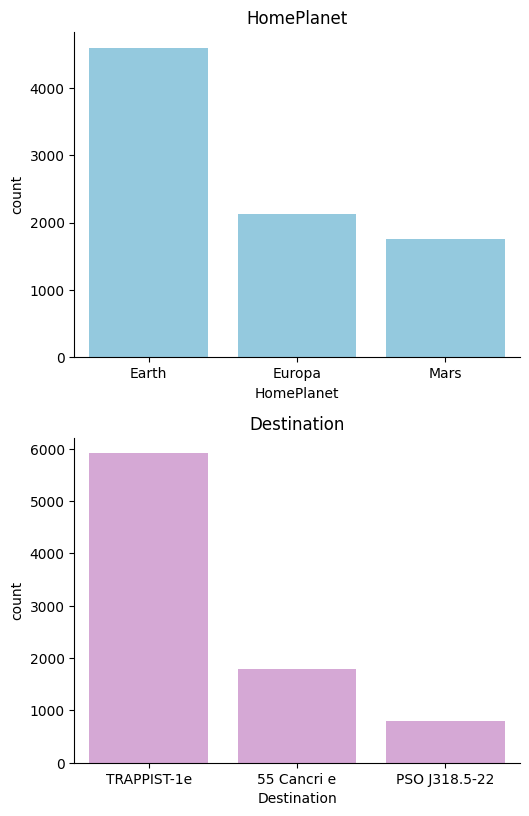

In [4]:
temp = ["HomePlanet", "Destination"]
colors = ["skyblue", "plum"]

fig = plt.figure(figsize=(10, 20))

for i, t in enumerate(temp):
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.countplot(data=df, x=t, ax=ax, order=df[t].value_counts().index, color=colors[i])
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(t)

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Earth ->TRAPPIST-1e'),
  Text(1, 0, 'Mars ->TRAPPIST-1e'),
  Text(2, 0, 'Europa ->TRAPPIST-1e'),
  Text(3, 0, 'Europa ->55 Cancri e'),
  Text(4, 0, 'Earth ->PSO J318.5-22'),
  Text(5, 0, 'Earth ->55 Cancri e'),
  Text(6, 0, 'Mars ->55 Cancri e'),
  Text(7, 0, 'Mars ->PSO J318.5-22'),
  Text(8, 0, 'Europa ->PSO J318.5-22')])

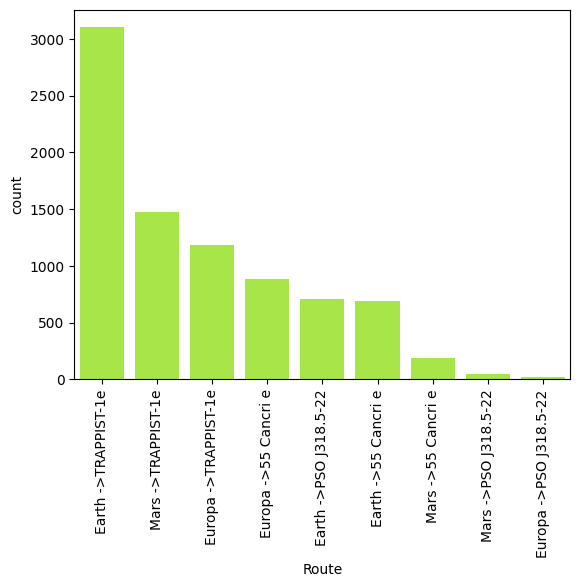

In [5]:
df1 = df.copy()
df1["Route"] = df1["HomePlanet"] + " ->" + df1["Destination"]

sns.countplot(x="Route", data=df1, order= df1["Route"].value_counts().index, color= "greenyellow")
plt.xticks(rotation = 90)

**Influence of deck on VIP status and spending**

In [6]:
df1[["Deck", "Room", "Side"]] = df1["Cabin"].str.split("/", 2, expand=True)
df1 = df1.dropna()
df1

C:\Users\pawfl\AppData\Local\Temp\ipykernel_16544\3771529654.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[["Deck", "Room", "Side"]] = df1["Cabin"].str.split("/", 2, expand=True)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Route,Deck,Room,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Europa ->TRAPPIST-1e,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Earth ->TRAPPIST-1e,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Europa ->TRAPPIST-1e,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Europa ->TRAPPIST-1e,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Earth ->TRAPPIST-1e,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Europa ->55 Cancri e,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Earth ->PSO J318.5-22,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Earth ->TRAPPIST-1e,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Europa ->55 Cancri e,E,608,S


In [7]:
df1[["Group", "NrInsideGr"]] = df1["PassengerId"].str.split("_", 1, expand=True)
df1["GroupSize"] = df1.groupby("Group")["Group"].transform("count")
df1.dropna()

C:\Users\pawfl\AppData\Local\Temp\ipykernel_16544\1237122684.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[["Group", "NrInsideGr"]] = df1["PassengerId"].str.split("_", 1, expand=True)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Route,Deck,Room,Side,Group,NrInsideGr,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,Europa ->TRAPPIST-1e,B,0,P,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,Earth ->TRAPPIST-1e,F,0,S,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,Europa ->TRAPPIST-1e,A,0,S,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,Europa ->TRAPPIST-1e,A,0,S,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,Earth ->TRAPPIST-1e,F,1,S,0004,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,Europa ->55 Cancri e,A,98,P,9276,01,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,Earth ->PSO J318.5-22,G,1499,S,9278,01,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,Earth ->TRAPPIST-1e,G,1500,S,9279,01,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,Europa ->55 Cancri e,E,608,S,9280,01,2


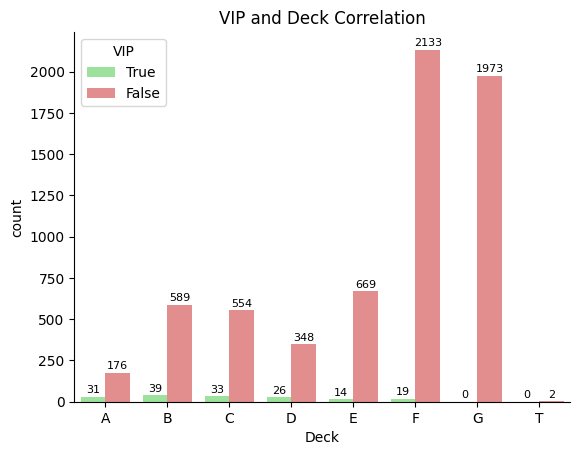

In [15]:
df1 = df1.sort_values(by= "Deck")
ax = sns.countplot(data= df1, x= "Deck", hue= "VIP", hue_order= [True, False], palette=['lightgreen', 'lightcoral'])
ax.set(title="VIP and Deck Correlation")
ax.spines[["top", "right"]].set_visible(False)
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

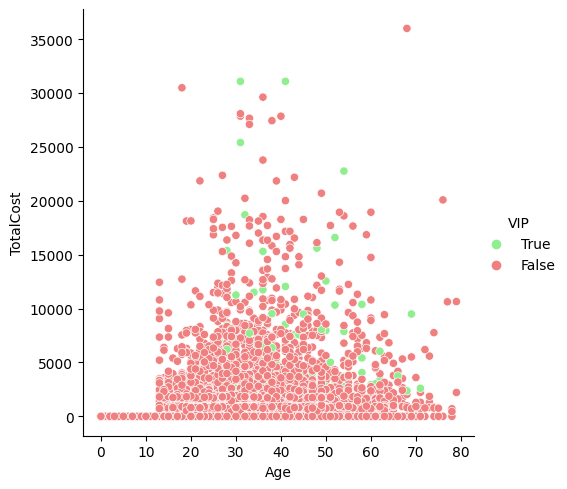

In [17]:
df1["TotalCost"] = df1[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)

sns.relplot(data=df1,x="Age", y="TotalCost", hue="VIP", hue_order=[True, False], palette=['lightgreen', 'lightcoral'])

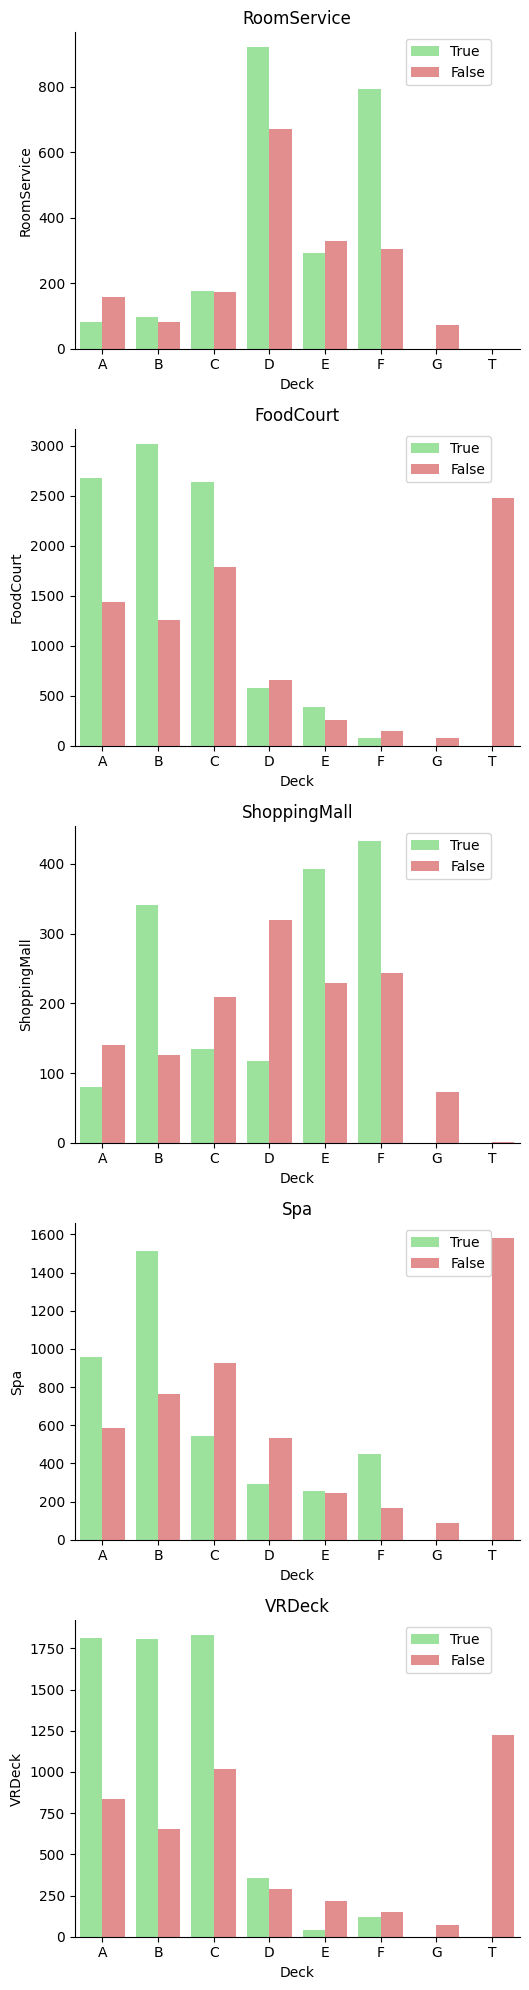

In [10]:
df1 = df1.sort_values(by= "Deck")
conveniences = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize= (10,20))
for i, con in enumerate(conveniences):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.barplot(data= df1, x= "Deck", y= con, axes=ax, hue= "VIP", hue_order=[True, False], palette=['lightgreen', 'lightcoral'], errorbar=None)
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(con)
    plt.legend(loc='upper right', bbox_to_anchor=(0.95, 1))
    
fig.tight_layout()

VIP status is not very popular
differend decks spends money on different things


<AxesSubplot: >

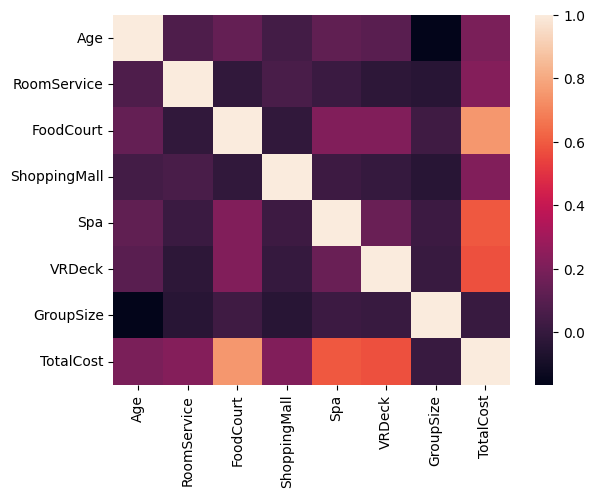

In [11]:
numerical_data = df1.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr())

FoodCourt, Spa and VRDeck influences the budget the most.

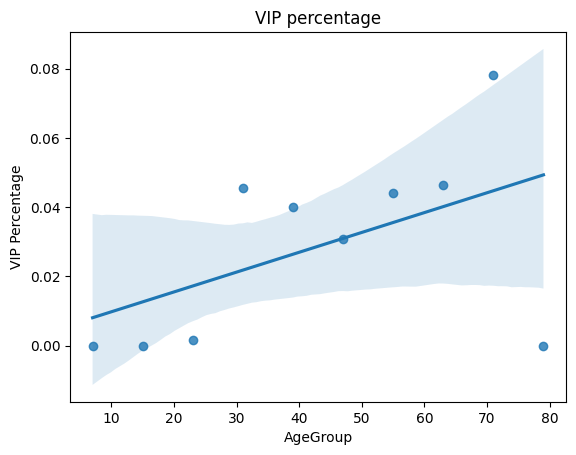

In [49]:
df2 = df1.copy()
bins=[i for i in range(0,85,8)]
df2['AgeGroup']=pd.cut(df2['Age'], bins=bins)

df2=df2.groupby('AgeGroup')['VIP'].value_counts().unstack()
df2 = df2.fillna(0)

df2['Age group size'] = df2.apply(lambda df2: df2[0]+df2[1], axis=1)
df2['VIP Percentage'] = df2.apply(lambda df2: df2[1]/df2[2], axis=1)


df2.reset_index(level=0, inplace=True)
df2['AgeGroup']=[i for i in range(7,85,8)]

sns.regplot(data=df2, x='AgeGroup' , y='VIP Percentage')
plt.title('VIP percentage')
plt.show()

**Age distributions**

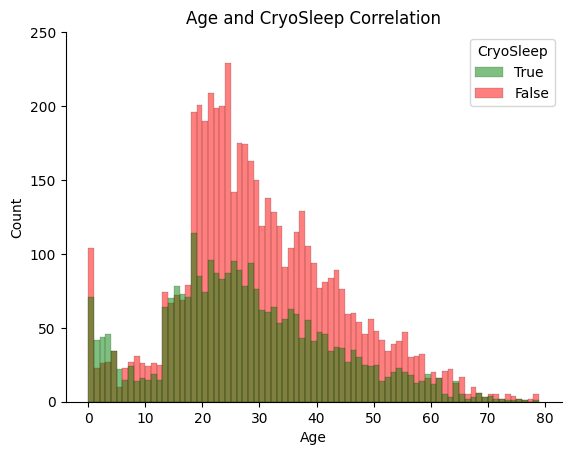

In [12]:
ax = sns.histplot(data=df, x= "Age", hue= "CryoSleep", hue_order= [True, False], binwidth= 1, kde= False, palette= ["g", "r"], linewidth= 0.1)
plt.yticks(range(0, 300, 50))
sns.set_style()
ax.set(title="Age and CryoSleep Correlation")
ax.spines[["top", "right"]].set_visible(False)

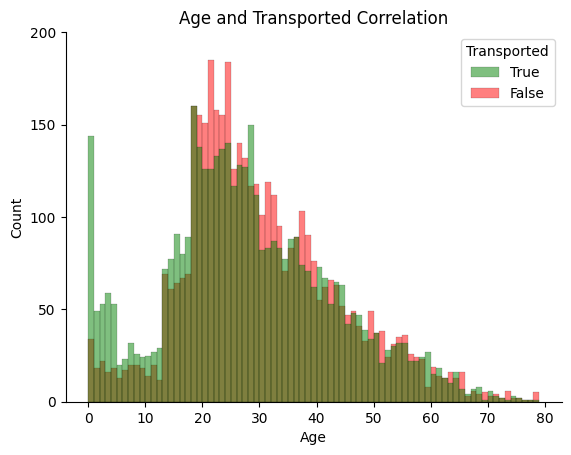

In [13]:
ax = sns.histplot(data=df, x= "Age", hue= "Transported", hue_order= [True, False], binwidth= 1, kde= False, palette= ["g", "r"], linewidth= 0.1)
plt.yticks(range(0, 201, 50))
ax.set(title= "Age and Transported Correlation")
ax.spines[["top", "right"]].set_visible(False)

**What influences if someone is transported to a different dimension?**

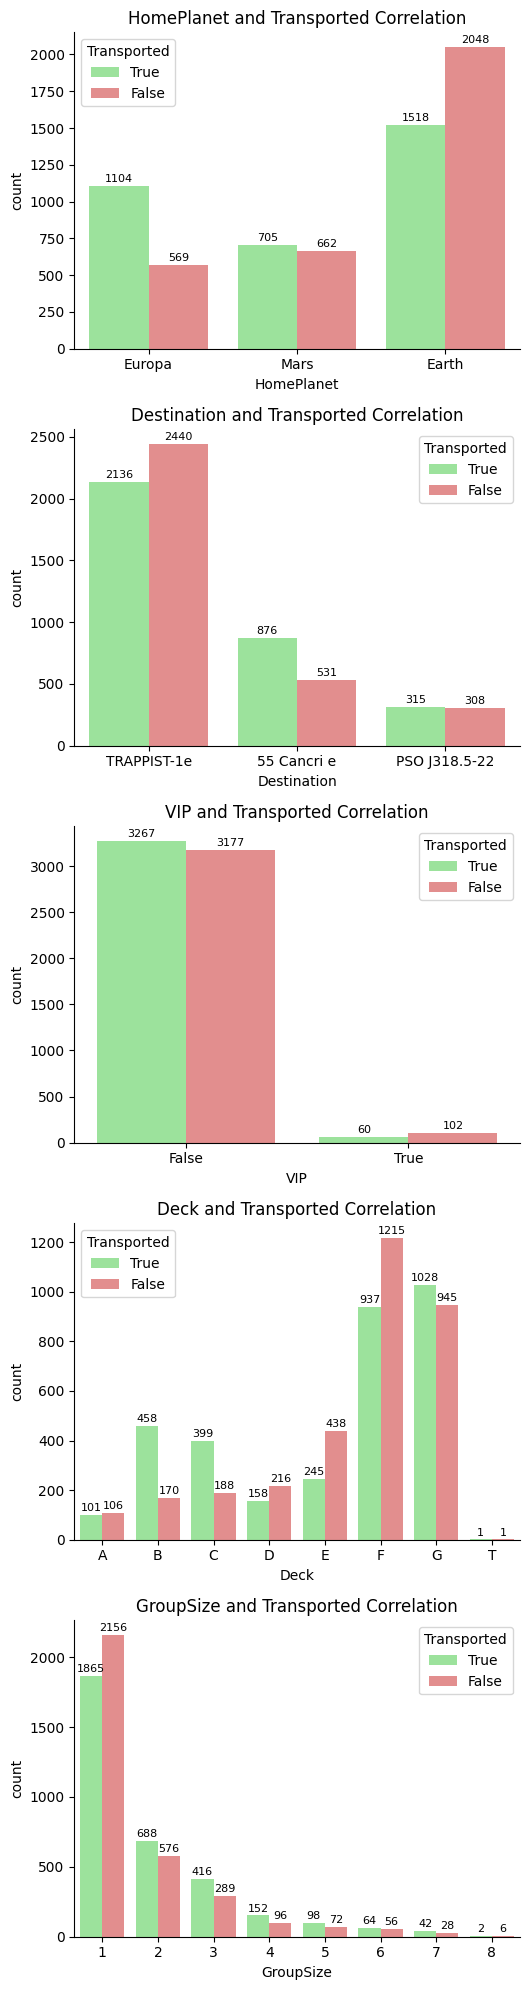

In [14]:
temp = ["HomePlanet", "Destination", "VIP", "Deck", "GroupSize"]

fig = plt.figure(figsize=(10, 20))
for i, t in enumerate(temp):
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.countplot(data=df1, x=t, ax=ax, hue= "Transported", hue_order=[True, False], palette= ["lightgreen", "lightcoral"])
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(t + " and Transported Correlation")
    
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

**Conclusion**
- traveling from different planet than Earth gives you a better chance of being transported
- VIP status gives nothing
- Decks B and C have better chance
- travelling alone is not recommended in this case